# Automated Quantum Support Vector Classifier

This notebook implements the Automated Quantum Support Vector Classifier for different approaches. These approaches are described below in detail.   
Determining the best feature map optimized for:
1. Maximum accuracy and minimum gates. 
2. Maximum recall and minimum gates. 
3. Minimum recall only. 

### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)
import time

### Directory where data is saved 

In [2]:
directory = "/mnt/d/Darsh/MSThesis/aqsvc/dataset/"
directory_final = "/mnt/d/Darsh/MSThesis/aqsvc/dataset/aqsvc_crm/"

### Importing the dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

column_names = [
    "Status", "Duration", "Credit_History", "Purpose", "Credit_Amount", "Savings", "Employment",
    "Installment_Rate", "Personal_Status", "Other_Debtors", "Residence_Since", "Property",
    "Age", "Other_Installment_Plans", "Housing", "Existing_Credits", "Job", "Liable_Persons",
    "Telephone", "Foreign_Worker", "Risk"
]

data = pd.read_csv(url, sep='\s+', names=column_names)

# Convert categorical columns to numerical using LabelEncoder
label_enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_enc.fit_transform(data[col])

# Map "Risk" to binary classification: 1 for good credit, 0 for bad credit
data['Risk'] = data['Risk'].map({1: 1, 2: 0})


data.to_csv(directory_final + "crm_dataset.csv", index = False)

### Dataset

In [4]:
df = pd.read_csv(directory + 'crm_dataset.csv')
df

Status  Duration  Credit_History  Purpose  Credit_Amount  Savings  \
0         0         6               4        4           1169        4   
1         1        48               2        4           5951        0   
2         3        12               4        7           2096        0   
3         0        42               2        3           7882        0   
4         0        24               3        0           4870        0   
..      ...       ...             ...      ...            ...      ...   
995       3        12               2        3           1736        0   
996       0        30               2        1           3857        0   
997       3        12               2        4            804        0   
998       0        45               2        4           1845        0   
999       1        45               4        1           4576        1   

     Employment  Installment_Rate  Personal_Status  Other_Debtors  ...  \
0             4                 4                2              0  ...   
1             2                 2                1              0  ...   
2             3                 2                2              0  ...   
3             3                 2                2              2  ...   
4             2                 3                2              0  ...   
..          ...               ...              ...            ...  ...   
995           3                 3                1              0  ...   
996           2                 4                0              0  ...   
997           4                 4                2              0  ...   
998           2                 4                2              0  ...   
999           0                 3                2              0  ...   

     Property  Age  Other_Installment_Plans  Housing  Existing_Credits  Job  \
0           0   67                        2        1                 2    2   
1           0   22                        2        1                 1    2   
2           0   49                        2        1                 1    1   
3           1   45                        2        2                 1    2   
4           3   53                        2        2                 2    2   
..        ...  ...                      ...      ...               ...  ...   
995         0   31                        2        1                 1    1   
996         1   40                        2        1                 1    3   
997         2   38                        2        1                 1    2   
998         3   23                        2        2                 1    2   
999         2   27                        2        1                 1    2   

     Liable_Persons  Telephone  Foreign_Worker  Risk  
0                 1          1               0     1  
1                 1          0               0     0  
2                 2          0               0     1  
3                 2          0               0     1  
4                 2          0               0     0  
..              ...        ...             ...   ...  
995               1          0               0     1  
996               1          1               0     1  
997               1          0               0     1  
998               1          1               0     0  
999               1          0               0     1  

[1000 rows x 21 columns]

## Maximum Accuracy and minimum Gates

### Evolutionary Multiobjective Genetic algorithm

In [51]:
def evol(output=directory_final + "crm_result_n5.csv"):
    data = pd.read_csv(directory + 'crm_dataset.csv')
    y = data['Risk'].values
    X = data.values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=10,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=1000)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi


/home/darsh/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darsh/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 010101111001011001100101011111110010111011001110100100011011000100110011101101011011011101101010111010001101000010110000000110110010011100000101000011110110111100101011011010111110
 -> accuracy = 0.72, gates = 24.0
String: 010010000000011011110101001000010111100000101011010111101011101100101011101111101100101001010110010010000011000110010100101101011011101011111101010100000101010000001011101001100010
 -> accuracy = 0.7, gates = 21.0
String: 001111010111001001001100100111011110110000011001111011111100100111011110110100101000000011001000010011111000000110000010001000101011111001110000100010010100101100000010011111000111
 -> accuracy = 0.695, gates = 35.0
String: 111111111000011110011001110001001101000011101000110011110010010110100011011011011001110000101011001000101101111110110100000101111101100101010111001010100111001011000100010000011100
 -> accuracy = 0.7, gates = 29.0
String: 11000101101111011101101000110000010101111001000011101010100101011001110111111111111011100110110101001

### Result File with sorted best model

In [52]:
import encoding2 as e2
import random

result = pd.read_csv(directory_final + 'crm_result_n5.csv',header=None)

def pareto_result(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

crm_result = pareto_result(result)
crm_result

ind                                               circ   gates   acc
0    702  1100010111110101010101001010001011010110101010...  1.5776  0.76
1    703  1100010111110101010101001010001011010110101010...  1.5776  0.76
2    704  1100010111110101010101001010001011010110101010...  1.5776  0.76
3    705  1100010111110101010111000110101011010110101010...  1.5776  0.76
4    706  1100010111110101010111000110101011010110101010...  1.5776  0.76
..   ...                                                ...     ...   ...
710  184  1100010111110101010101001010001011010110101011...  0.0000  0.70
711  185  1100010111110101010101001010001011010110101011...  0.0000  0.70
712  186  1100010111110101010111000110101011010110101011...  0.0000  0.70
713  187  1100010111110101010101001010001011010110101011...  0.0000  0.70
714  188  1100010111110101010101001010001011010110101011...  0.0000  0.70

[715 rows x 4 columns]

### Plotting the best model recieved 

['11000', '10111', '11010', '10101', '01001', '01000', '10110', '10110', '10101', '00000', '10101', '11010', '01011', '10110', '11000', '11001', '01110', '11101', '10110', '11110', '11010', '10110', '10101', '10101', '10100', '10111', '11010', '01010', '11011', '11000', '01001', '10010', '01011', '01100', '10101', '11001']
6.0


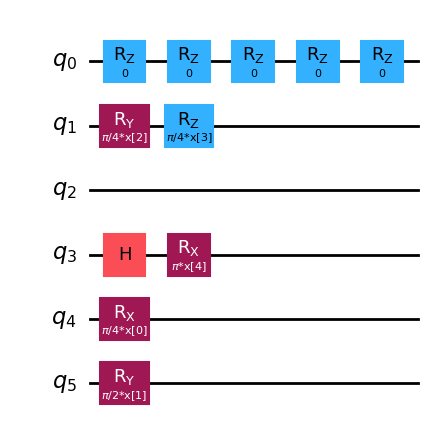

In [56]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import QuantumRegister, ClassicalRegister
import qiskit_ibm_runtime
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=6, nparameters=10)
fm, puertas = cc(coding_bits(crm_result.circ[0]))
print(puertas)
fm.draw(output='mpl')

## Maximum Recall and Minimum Gates

### Evolutionary Genetic Algorithm

In [12]:
def evol(output=directory_final + "crm_result_n5_recall.csv"):
    data = pd.read_csv(directory + 'crm_dataset.csv')
    y = data['Risk'].values
    X = data.values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm_recall(nqubits=6, depth=6, nparameters=10,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=1000)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
String: 010100000011001010010111101101010001011101001111001110110000100101011111000110000110111011010100110000001111101101001010001111101001111001101101000110011101000110111111101101110111
 -> recall = 0.9714285714285714, gates = 21.0


/home/darsh/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 101011001010111111100111111100110111101010011101011001110000101101010011010101000001100111000001000000100101000001000100000000111101000110111011010010001011101010000101010101100111
 -> recall = 1.0, gates = 25.0
String: 111011000111001110101011111100011001000101001001101010110100010101100101100111010110100111110101110110000001010010011000101100011001111001110011011001001111111000100000000100100001
 -> recall = 0.9285714285714286, gates = 32.0
String: 000000101100011001100100110100100111110111010100111111101111001000100110010100010000011101100001000101110000011110111011111000100111110101101111001010010011111111101111110100111010
 -> recall = 0.9142857142857143, gates = 26.0
String: 101011010011010110010001101010011111000111000011110011000001000000111001100110000110101110111110100010110110001100110100011000111010001111100000010001111010100110100001100111001100
 -> recall = 0.9714285714285714, gates = 24.0
String: 1110101011010011001010000111111101111010111010001001100110110000010

### Sorting the Dataset

In [13]:
import encoding2 as e2
import random

result_recall = pd.read_csv(directory_final + 'crm_result_n5_recall.csv',header=None)

def pareto_result(dataframe):
    dataframe.columns=['ind','circ','gates','recall']
    dataframe.sort_values(['recall','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

crm_result_recall = pareto_result(result_recall)
crm_result_recall

ind                                               circ  gates  recall
0      0  0101001001110111010001000101100100011011010010...    1.0     1.0
1      1  0101001001110111010001000101100100011011010010...    1.0     1.0
2      2  0101001001110111010001000101100100011010010010...    1.0     1.0
3      3  0101001001101111010001000101100100011010010010...    1.0     1.0
4      4  0101001001110111010001000101100100011010010000...    1.0     1.0
..   ...                                                ...    ...     ...
567  567  1100011001110111010001000101100100011011010000...    1.0     1.0
568  568  1101111011101111010001000101100100011011010010...    1.0     1.0
569  569  1100011001110111010001000101100100011010010010...    1.0     1.0
570  570  1100011011101111010001000101100100011011010000...    1.0     1.0
571  571  0101001001110111010001000101100100011011010000...    1.0     1.0

[572 rows x 4 columns]

### Evaluating the Quantum Circuit

['01010', '01001', '11011', '10100', '01000', '10110', '01000', '11011', '01001', '01001', '11011', '10101', '11111', '01001', '10110', '01000', '10100', '00011', '01010', '11010', '01000', '10100', '11001', '10110', '11011', '01010', '01010', '11001', '01010', '10100', '11011', '10110', '01001', '11010', '00001', '01001']
3.0


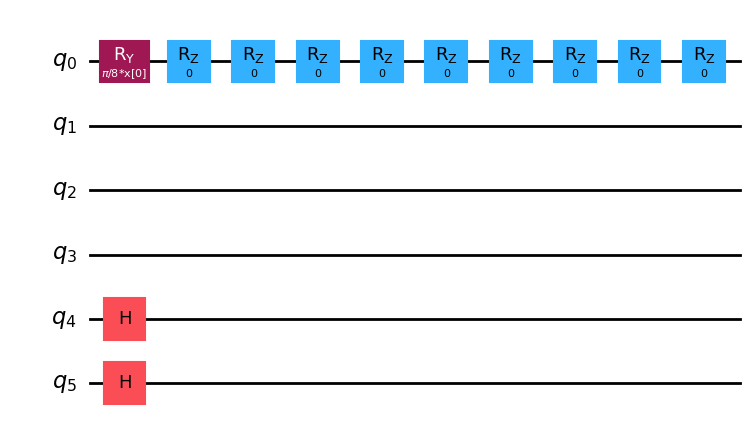

In [15]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import QuantumRegister, ClassicalRegister
import qiskit_ibm_runtime
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=6, nparameters=10)
fm, puertas = cc(coding_bits(crm_result_recall.circ[0]))
print(puertas)
fm.draw(output='mpl')

## Maximum Recall

### Evolutionary Genetic Algorithm

In [6]:
import gsvm
import fitness

def evol(output=directory_final + "crm_result_n5_recall_single.csv"):
    data = pd.read_csv(directory + 'crm_dataset.csv')
    y = data['Risk'].values
    X = data.values
    start = time.time()
    pop, logbook = gsvm.gsvm_recall_single(nqubits=6, depth=6, nparameters=10,
                                           X=X, y=y, mu=100, lambda_=10, ngen=20)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pop):
            genes =''.join(str(i) for i in list(ind))
            rec = ind.fitness.values
            line = f'{ide},"{genes}",{rec[0]}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

/home/darsh/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darsh/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	mean    	std      	max	min 
0  	100   	0.970429	0.0414534	1  	0.85
1  	10    	0.979786	0.0302043	1  	0.9 
2  	10    	0.984357	0.0244468	1  	0.921429
3  	10    	0.989071	0.0183352	1  	0.942857
4  	10    	0.991571	0.0153988	1  	0.95    
5  	10    	0.995   	0.0103756	1  	0.964286
6  	10    	0.997286	0.00675972	1  	0.971429
7  	10    	0.998357	0.00438632	1  	0.978571
8  	10    	0.9995  	0.00182248	1  	0.992857
9  	10    	1       	0         	1  	1       
10 	10    	1       	0         	1  	1       
11 	10    	1       	0         	1  	1       
12 	10    	1       	0         	1  	1       
13 	10    	1       	0         	1  	1       
14 	10    	1       	0         	1  	1       
15 	10    	1       	0         	1  	1       
16 	10    	1       	0         	1  	1       
17 	10    	1       	0         	1  	1       
18 	10    	1       	0         	1  	1       
19 	10    	1       	0         	1  	1       
20 	10    	1       	0         	1  	1       
Simulation finished after 42.830660343170166 second

### Sorting the Dataset

In [7]:
import encoding2 as e2
import random

result_recall_single = pd.read_csv(directory_final + 'crm_result_n5_recall_single.csv',header=None)

def pareto_result(dataframe):
    dataframe.columns=['ind','circ','recall']
    dataframe.sort_values(['recall'], ascending=[False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

crm_result_recall_single = pareto_result(result_recall_single)
crm_result_recall_single

ind                                               circ  recall
0    99  0101110000011000111100100100111011000111110110...     1.0
1     0  0001001000110100010011000111011001111100000010...     1.0
2     1  1001010011011101010010001011101000001101110011...     1.0
3     2  1000101011010110010101100111001000101000010100...     1.0
4    84  0111010010101100011010110101011010111111010001...     1.0
..  ...                                                ...     ...
95    7  1011110010110110100001110010101011111000000000...     1.0
96    8  1111110010100110111101000100011110001111010100...     1.0
97    9  1111001010000110111101000100011110001111010100...     1.0
98   10  1001000100110111001001011010100001000100011110...     1.0
99   11  1001010011011101010010001011101000001101011011...     1.0

[100 rows x 3 columns]

### Determining the circuit

['01011', '10000', '01100', '01111', '00100', '10011', '10110', '00111', '11011', '01001', '01110', '11101', '11011', '10101', '11110', '10001', '11000', '11001', '10000', '11010', '11001', '10000', '01100', '00010', '00011', '11110', '00010', '11000', '11010', '10110', '01011', '10100', '00010', '10101', '11010', '11011']
20.0


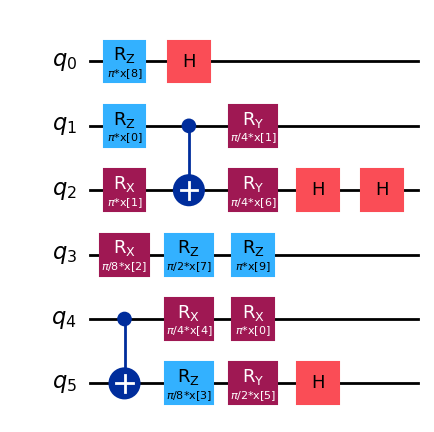

In [8]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import QuantumRegister, ClassicalRegister
import qiskit_ibm_runtime
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=6, nparameters=10)
fm, puertas = cc(coding_bits(crm_result_recall_single.circ[0]))
print(puertas)
fm.draw(output='mpl')